In [204]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

# Reading Data 

Data of Tuberculosis in Kyrgyrzstan by region from 2009-2018

In [205]:
df2009 = pd.read_excel(r"C:\Users\ASUS\Downloads\2009-2018.xlsx")
df2009

,Регион,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Кыргызская Республика,5595,5510,5535,5851,5859,5898,5853,5680,5616,5274
1,Баткенская область,356,358,351,410,418,409,354,334,360,338
2,Джалал-Абадская область,858,854,851,904,878,948,868,983,946,868
3,Иссык-Кульская область,296,297,302,316,319,295,273,286,233,239
4,Нарынская область,250,270,251,280,244,268,234,216,168,193
5,Ошская область,1104,1015,991,1039,1156,1101,1135,1068,1098,992
6,Таласская область,225,244,252,230,257,250,239,212,190,153
7,Чуйская область,1160,1159,1096,1196,1119,1114,1245,1212,1244,1212
8,г.Бишкек,931,896,929,1052,1101,1102,1091,979,988,896
9,г.Ош,254,215,220,247,218,276,245,258,256,243


Data of Tuberculosis in Kyrgyrzstan by region from 2019-2023

In [206]:
df2019 = pd.read_excel(r"C:\Users\ASUS\Downloads\2019-2023tuberkulez.xlsx")
df2019 


,Регион,2019 год,2020 год,2021 год,2022 год,2023 год
0,Кыргызская Республика,5033,3523,3896,3984,1078
1,Баткенская область,308,256,260,237,75
2,Джалал-Абадская область,840,616,697,703,181
3,Иссык-Кульская область,251,143,187,208,62
4,Нарынская область,164,111,152,159,52
5,Ошская область,1015,712,771,781,208
6,Таласская область,149,122,125,116,30
7,Чуйская область,1106,788,869,904,255
8,г.Бишкек,848,552,635,676,167
9,г.Ош,219,172,148,168,37


Population of Kyrgyzstan 


In [207]:
pop = pd.read_excel(r"C:\Users\ASUS\Downloads\Населениекр1.xlsx")
pop 

,Население регионов Кыргызстана,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,область,1999 г.,2010 г.,2020 г,2023 г.
1,область Талас,199 872,229 000,267 400,273 500
2,город Ош,208 520,259 100,312 500,361 300
3,Нарынская область,249 115,259 300,289 600,308 400
4,Баткенская область,382 426,433 800,537 300,570 900
5,Иссык-Кульская область,413 149,441 300,496 100,538 400
6,город Бишкек,762 308,846 500,1 053 900,1145000
7,Чуйская область,770 811,808 200,959 800,1068700
8,Джалал-Абадская область,869 258,1 023 200,1 238 800,1311000
9,Ошская область,967 479,1 117 900,1 368 100,1460400


# Processing of data
Processing the data of population Kyrgyzstan

In [208]:
pop = pop.replace('\xa0', '', regex=True)
pop.columns = pop.iloc[0]
pop.drop(0, inplace=True)
pop = pop.rename(columns={'1999г.': '1999', '2010г.': '2010', '2020 г': '2020', '2023г.': '2023'})
pop 

,область,1999,2010,2020,2023
1,область Талас,199872,229000,267400,273500
2,город Ош,208520,259100,312500,361300
3,Нарынская область,249115,259300,289600,308400
4,Баткенская область,382426,433800,537300,570900
5,Иссык-Кульская область,413149,441300,496100,538400
6,городБишкек,762308,846500,1053900,1145000
7,Чуйская область,770811,808200,959800,1068700
8,Джалал-Абадская область,869258,1023200,1238800,1311000
9,Ошская область,967479,1117900,1368100,1460400
10,всего,4822938,5418300,6523500,7037600


Combining two dataframes for working :)

In [209]:
tuber = pd.merge(df2009, df2019)
tuber.set_index(tuber['Регион'], inplace=True)
tuber.drop(columns='Регион', inplace=True)
tuber

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019 год,2020 год,2021 год,2022 год,2023 год
Регион,,,,,,,,,,,,,,,
Кыргызская Республика,5595,5510,5535,5851,5859,5898,5853,5680,5616,5274,5033,3523,3896,3984,1078
Баткенская область,356,358,351,410,418,409,354,334,360,338,308,256,260,237,75
Джалал-Абадская область,858,854,851,904,878,948,868,983,946,868,840,616,697,703,181
Иссык-Кульская область,296,297,302,316,319,295,273,286,233,239,251,143,187,208,62
Нарынская область,250,270,251,280,244,268,234,216,168,193,164,111,152,159,52
Ошская область,1104,1015,991,1039,1156,1101,1135,1068,1098,992,1015,712,771,781,208
Таласская область,225,244,252,230,257,250,239,212,190,153,149,122,125,116,30
Чуйская область,1160,1159,1096,1196,1119,1114,1245,1212,1244,1212,1106,788,869,904,255
г.Бишкек,931,896,929,1052,1101,1102,1091,979,988,896,848,552,635,676,167


# Let's start with amount of cases of tuberculosis in Kyrgyzstan
Need to transpose as I need 'years' as row not as columns

In [210]:
tuber_transpose = tuber.transpose()
tuber_transpose.reset_index(inplace=True)
tuber_transpose = tuber_transpose.rename(columns={'Кыргызская Республика': 'Kyrgyz_Republic', 'Баткенская область': 'Batken', 'Джалал-Абадская область': 'Djalal_Abad', 'Иссык-Кульская область': 'Issyk_Kul', 'Нарынская область': 'Naryn', 'Ошская область': 'Osh_region', 'Таласская область': 'Talas', 'Чуйская область': 'Chui', 'г.Бишкек': 'Bishkek', 'г.Ош': 'Osh_city'})

tuber_transpose['index'] = tuber_transpose['index'].str.rstrip(' год ')
tuber_transpose

Регион,index,Kyrgyz_Republic,Batken,Djalal_Abad,Issyk_Kul,Naryn,Osh_region,Talas,Chui,Bishkek,Osh_city
0,2009,5595,356,858,296,250,1104,225,1160,931,254
1,2010,5510,358,854,297,270,1015,244,1159,896,215
2,2011,5535,351,851,302,251,991,252,1096,929,220
3,2012,5851,410,904,316,280,1039,230,1196,1052,247
4,2013,5859,418,878,319,244,1156,257,1119,1101,218
5,2014,5898,409,948,295,268,1101,250,1114,1102,276
6,2015,5853,354,868,273,234,1135,239,1245,1091,245
7,2016,5680,334,983,286,216,1068,212,1212,979,258
8,2017,5616,360,946,233,168,1098,190,1244,988,256
9,2018,5274,338,868,239,193,992,153,1212,896,243


Visualising of amount of people who has tuberculosis in Kyrgyzstan

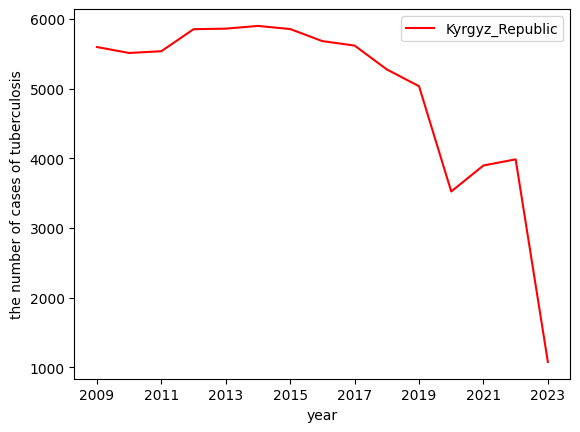

In [211]:
tuber_transpose.plot(x='index', y='Kyrgyz_Republic', kind='line', c='red')
plt.ylabel('the number of cases of tuberculosis')
plt.xlabel('year')
plt.show()

Calculating the percentage of population who has tuberculosis in Kyrgyzstan

In [212]:
tuber_p = [tuber.loc['Кыргызская Республика']['2010'], tuber.loc['Кыргызская Республика']['2020 год'], tuber.loc['Кыргызская Республика']['2023 год']]

pop_p = [int(pop['2010'][10]), int(pop['2020'][10]), int(pop['2023'][10])]
years = [2010, 2020, 2023]

percent = [round(tuber_p[i]/pop_p[i] * 100, 3) for i in range(3)]
for i in range(len(percent)):
    print(f'In {years[i]} the percent of tuberculosis of Kyrgyzstan population is {percent[i]}%')

In 2010 the percent of tuberculosis of Kyrgyzstan population is 0.102%
In 2020 the percent of tuberculosis of Kyrgyzstan population is 0.054%
In 2023 the percent of tuberculosis of Kyrgyzstan population is 0.015%


# Death from tuberculosis in Kyrgyzstan
 Creating data of that I have found only this information about death from tuberculosis in Kyrgyzstan

In [213]:
death_by_tuber = pd.DataFrame({801, 738, 644, 594, 526}, index = [2017, 2018, 2019, 2020, 2021])
death_by_tuber.reset_index(inplace=True)
death_by_tuber.columns = ['year', 'amount_of_death']

death_by_tuber

,year,amount_of_death
0,2017,801
1,2018,738
2,2019,594
3,2020,644
4,2021,526


Getting from data only needed part

In [214]:
dlt = tuber_transpose[-7:-2]
dlt.reset_index(drop=True, inplace=True)
dlt 

Регион,index,Kyrgyz_Republic,Batken,Djalal_Abad,Issyk_Kul,Naryn,Osh_region,Talas,Chui,Bishkek,Osh_city
0,2017,5616,360,946,233,168,1098,190,1244,988,256
1,2018,5274,338,868,239,193,992,153,1212,896,243
2,2019,5033,308,840,251,164,1015,149,1106,848,219
3,2020,3523,256,616,143,111,712,122,788,552,172
4,2021,3896,260,697,187,152,771,125,869,635,148


Visualising of amount of death from tuberculosis in Kyrgyzstan

<Axes: xlabel='year'>

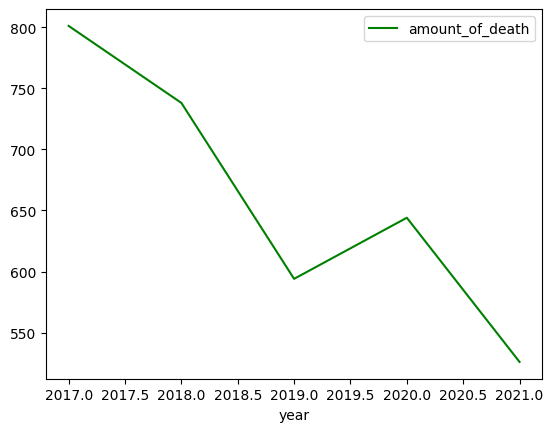

In [215]:
death_by_tuber.plot(x='year', y='amount_of_death', kind='line', c='green')

Calculating the percentage of death from tuberculosis who has tuberculosis and showing it in graph.

Percents of death who has a tuberculosis 14.3%
Percents of death who has a tuberculosis 14.0%
Percents of death who has a tuberculosis 11.8%
Percents of death who has a tuberculosis 18.3%
Percents of death who has a tuberculosis 13.5%


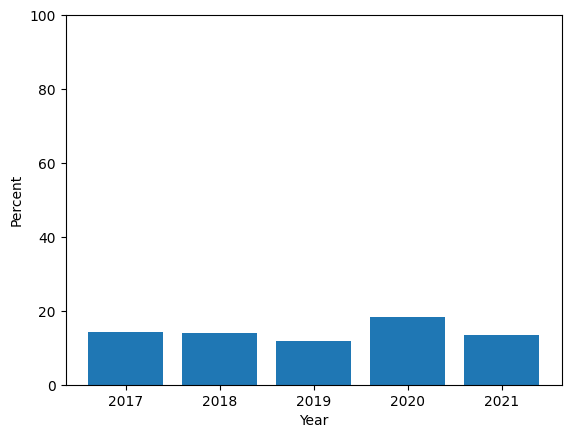

In [216]:
percent_tuber = (death_by_tuber['amount_of_death']/dlt['Kyrgyz_Republic']) * 100 
for i in percent_tuber:
    print(f'Percents of death who has a tuberculosis {round(i, 1)}%')

plt.bar(dlt['index'], percent_tuber)
plt.ylim(0, 100)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.show()

# Showing how much tabacco usage affects on tuberculosis
 Creating a data of percentage of usage tobacco in Kyrgyzsan

In [217]:
tabak = pd.DataFrame({27.3, 26.8, 24.1, 22.7, 20.9}, index=[2023, 2022, 2021, 2020, 2019], columns =['smoking_percent'])
tabak = tabak.apply(lambda x: x[::-1])
tabak.reset_index(inplace=True)
tabak

,index,smoking_percent
0,2019,27.3
1,2020,26.8
2,2021,24.1
3,2022,22.7
4,2023,20.9


Again getting only needed part to be similiar to data of tabak

In [218]:
dlt1 = tuber_transpose[-5:]
dlt1.reset_index(drop=True, inplace=True)
dlt1.drop(columns=['index'], inplace=True)
dlt1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12124\2013664897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dlt1.drop(columns=['index'], inplace=True)


Регион,Kyrgyz_Republic,Batken,Djalal_Abad,Issyk_Kul,Naryn,Osh_region,Talas,Chui,Bishkek,Osh_city
0,5033,308,840,251,164,1015,149,1106,848,219
1,3523,256,616,143,111,712,122,788,552,172
2,3896,260,697,187,152,771,125,869,635,148
3,3984,237,703,208,159,781,116,904,676,168
4,1078,75,181,62,52,208,30,255,167,37


In [219]:
tables = pd.concat([tabak, dlt1], axis=1)
tables

,index,smoking_percent,Kyrgyz_Republic,Batken,Djalal_Abad,Issyk_Kul,Naryn,Osh_region,Talas,Chui,Bishkek,Osh_city
0,2019,27.3,5033,308,840,251,164,1015,149,1106,848,219
1,2020,26.8,3523,256,616,143,111,712,122,788,552,172
2,2021,24.1,3896,260,697,187,152,771,125,869,635,148
3,2022,22.7,3984,237,703,208,159,781,116,904,676,168
4,2023,20.9,1078,75,181,62,52,208,30,255,167,37


In [220]:
x = tables['smoking_percent']
y = tables['Kyrgyz_Republic']
model = smf.ols('y ~ x', data=tables)
result = model.fit()
result.summary()

C:\Users\ASUS\PycharmProjects\DataScience\venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     4.020
Date:                Thu, 09 May 2024   Prob (F-statistic):              0.139
Time:                        00:51:07   Log-Likelihood:                -40.866
No. Observations:                   5   AIC:                             85.73
Df Residuals:                       3   BIC:                             84.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6473.3129   4999.955     -1.295      0.286   -2.24e+04    9438.774
x            409.5284    204.244      2.005      0.139    -240.466    1059.522
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.455
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.525
Skew:                          -0.075   Prob(JB):                        0.769
Kurtosis:                       1.420   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

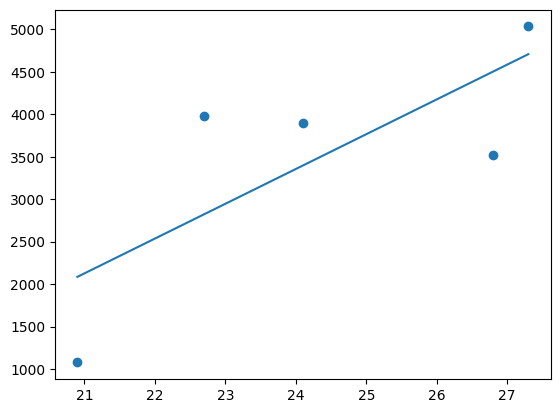

In [221]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

As we can see that usage of tabak by population affect a lot. So that's why the amount of having tuberculosis is decreasing as percentage of population who uses tabacco also decreases.

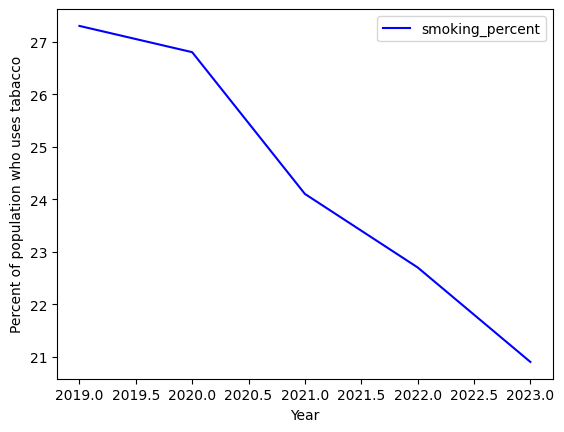

In [222]:
tabak.plot(x='index', y='smoking_percent', kind='line', c='blue')
plt.ylabel('Percent of population who uses tabacco')
plt.xlabel('Year')
plt.show()

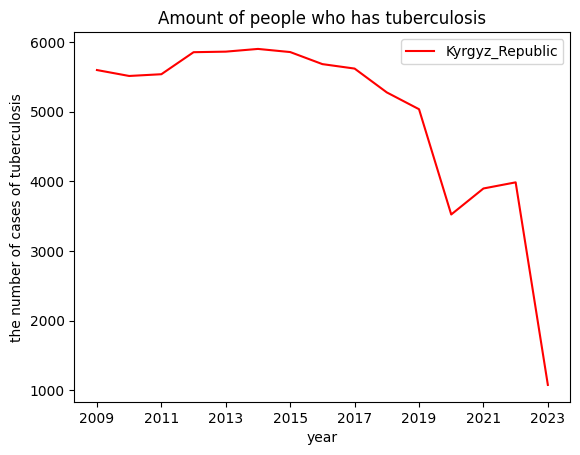

In [223]:
tuber_transpose.plot(x='index', y='Kyrgyz_Republic', kind='line', c='red')
plt.ylabel('the number of cases of tuberculosis')
plt.xlabel('year')
plt.title('Amount of people who has tuberculosis')
plt.show()

# Conclusion
Recent years the amount of people who has tuberculosis is decreasing. The main reason of that is decreasing of population who uses tabacco. As we can see from the graph of tabacco usage and amount of people who has tuberculosis. Also the amount of death from tuberculosis is decreasing. The percentage of population who has tuberculosis is also decreasing. 

This project was created by Baiastan and Abai.